# start2impact University | Progetto Advanced Analytics

Ti diamo il benvenuto nel notebook del progetto del Corso Advanced Analytics!

Prima di tutto bisogna importare una serie di librerie core, che saranno quelle principali per rispondere alle domande del progetto:

In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt

Per usare il tuo Google Drive con Colab, bisogna montarlo tramite il seguente comando. Dovrebbe chiederti l'accesso tramite il tuo account Google, concediglielo e seleziona tutte le spunte disponibili.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google.colab'

Dopodiché puoi partire con l'importazione del dataset **supermarket sales**, il primo che ti servirà: dovresti averlo già uploadato nel tuo Drive, inserisci la location dove lo hai salvato andando a sostituire il placeholder *{PATH_AL_FILE_SUL_TUO_DRIVE}*, così da importarlo nell'ambiente di lavoro:

In [3]:
#regression_raw_dataset = pd.read_csv('/content/drive/MyDrive/Progetti/supermarket_sales.csv', encoding='windows-1254')
regression_raw_dataset = pd.read_csv('supermarket_sales.csv')

# Esplorazione del dataset

**In questa breve sezione andrai a visualizzare il dataset in forma tabellare**, così da averne una rappresentazione più intuitiva e comprendere meglio con che tipologia di dato hai a che fare. Per semplicità si mostrano solo le prime 100 occorrenze.

In [4]:
regression_raw_dataset.head(100)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,594-34-4444,A,Yangon,Normal,Male,Electronic accessories,97.16,1,4.8580,102.0180,3/8/2019,20:38,Ewallet,97.16,4.761905,4.8580,7.2
96,766-85-7061,B,Mandalay,Normal,Male,Health and beauty,87.87,10,43.9350,922.6350,3/29/2019,10:25,Ewallet,878.70,4.761905,43.9350,5.1
97,871-39-9221,C,Naypyitaw,Normal,Female,Electronic accessories,12.45,6,3.7350,78.4350,2/9/2019,13:11,Cash,74.70,4.761905,3.7350,4.1
98,865-92-6136,A,Yangon,Normal,Male,Food and beverages,52.75,3,7.9125,166.1625,3/23/2019,10:16,Ewallet,158.25,4.761905,7.9125,9.3


Vai quindi a vedere più nel dettaglio quali sono i metadati principali delle colonne del dataset:

In [5]:
regression_raw_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

Da questo puoi già vedere che non ci sono valori nulli, per cui non dovrai usare nessuna strategia per fillarli, altri valori invece sono categorici e quindi bisognerà usare una strategia per codificarli; insomma hai già un po' di informazioni di massima sul dato!
Alcune colonne risultano poco utili ai fini dell'analisi per la predizione e quindi vanno semplicemente eliminate, come per esempio l'ID della fattura, la data della vendita, l'orario e un altro paio:

In [6]:
regression_dataset = regression_raw_dataset.drop(columns=['Invoice ID', 'Tax 5%', 'Total', 'Date', 'Time', 'cogs', 'gross margin percentage'])

Puoi quindi vedere che alcune colonne sono state rimosse e adesso hai solo quelle che effettivamente sono utili ai fini dello sviluppo del modello:

In [7]:
regression_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Branch         1000 non-null   object 
 1   City           1000 non-null   object 
 2   Customer type  1000 non-null   object 
 3   Gender         1000 non-null   object 
 4   Product line   1000 non-null   object 
 5   Unit price     1000 non-null   float64
 6   Quantity       1000 non-null   int64  
 7   Payment        1000 non-null   object 
 8   gross income   1000 non-null   float64
 9   Rating         1000 non-null   float64
dtypes: float64(3), int64(1), object(6)
memory usage: 78.3+ KB


# Media, mediana, moda e deviazione standard

Si parte con un esercizio molto semplice, in cui ti chiedo di **calcolare usando numpy la media, la mediana e la moda della colonna su cui andrai a fare predizioni (la label), ovvero Rating**. La colonna "Rating" dà una valutazione alla transazione in base alla redditività della stessa e quindi ti dice quanto è stata proficua la stessa per la catena di supermercati.
Questo ti darà una prima idea di sintesi sui rating assegnati ai vari ordini:

In [8]:
regression_dataset['Rating'].describe()

count    1000.00000
mean        6.97270
std         1.71858
min         4.00000
25%         5.50000
50%         7.00000
75%         8.50000
max        10.00000
Name: Rating, dtype: float64

In [9]:
mean = round(np.mean(regression_dataset['Rating']),2)
median = np.median(regression_dataset['Rating'])
mode = scipy.stats.mode(regression_dataset['Rating'])
print('Mean value (μ): {}\nMedian value: {}\nMode: {}'.format(mean,median,mode[0]))

Mean value (μ): 6.97
Median value: 7.0
Mode: 6.0


Come hai visto durante il Corso, la **deviazione** è una importantissima misura di "sparsità" dei dati, ed è una informazione che è molto utile da ottenere sulla label. Ti chiedo quindi di calcolarla, sempre usando Numpy:

In [10]:
stdev = round(np.std(regression_dataset['Rating']),2)
print('Standard deviation (σ): {}'.format(stdev))

Standard deviation (σ): 1.72


# Come sono distribuiti i valori della label

A questo punto andiamo a vedere come sono graficamente distribuiti i dati:

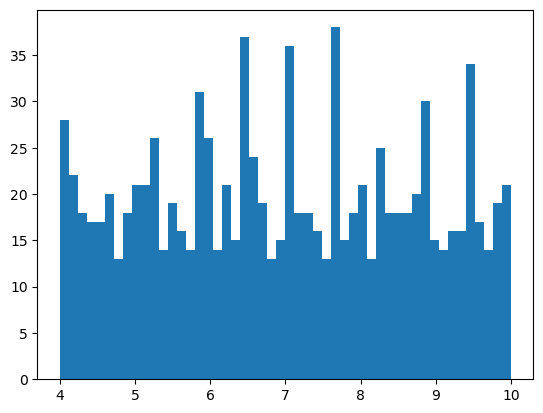

In [11]:
plt.hist(regression_dataset['Rating'], 50)
plt.show()

Come puoi vedere, la distribuzione dei rating è più o meno uniforme e non c'è skewness.

Il discorso è invece diverso per l'utile lordo:

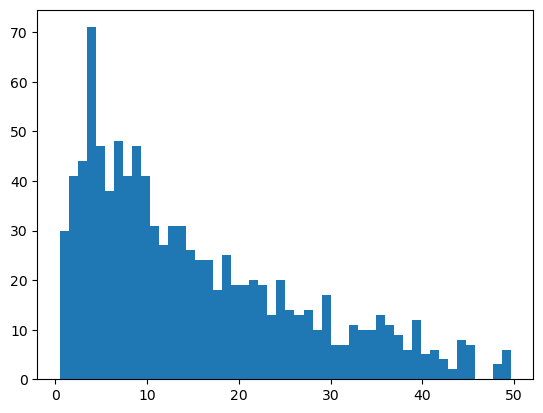

In [12]:
plt.hist(regression_dataset['gross income'], 50)
plt.show()

Come puoi vedere, qui la skewness c'è eccome e la maggioranza degli ordini sembra avere un income lordo basso.
Qual è, quindi, il valore di questa skewness esattamente? Tocca a te scoprirlo nella prossima cella!

Un piccolo consiglio: farlo con Numpy non è il modo più semplice!

In [13]:
# Codice per calcolare la skewness del gross income
skewed = scipy.stats.skew(regression_dataset['Rating']).round(6)
print('Skewness (µ₃/σ³): {}'.format(skewed*1000),'* 10⁻³')

Skewness (µ₃/σ³): 8.996 * 10⁻³


# Encoding delle variabili categoriche

Come avrai sicuramente notato, ci sono delle variabili (come "Branch", "City", "Customer type", "Gender", "Product line" e "Payment") che non sono numeriche e che quindi non possono essere direttamente masticate dagli algoritmi che andrai a utilizzare più tardi.
Ricordi le **tecniche per effettuarne l'enconding**? Questo è il momento di usarle per trasformarle in vettori!

In [14]:
# codice per effettuare l'enconding delle variabili categoriche
# Lista per rinominare le colonne delle città dopo l'Encoding
city_list = regression_dataset['City'].unique().tolist()
city_list = city_list[::-1]
print(city_list)

['Mandalay', 'Naypyitaw', 'Yangon']


In [15]:
# Lista per colonne branch
branch_list = regression_dataset['Branch'].unique().tolist()
branch_list.sort()
print(branch_list)

['A', 'B', 'C']


In [16]:
# Lista per colonne customer type
cust_type_list = regression_dataset['Customer type'].unique().tolist()
print(cust_type_list)

['Member', 'Normal']


In [17]:
# Lista per colonne con tipo gender
gender_list = regression_dataset['Gender'].unique().tolist()
print(gender_list)

['Female', 'Male']


In [18]:
# Lista per colonne product line
product_list = regression_dataset['Product line'].unique().tolist()
product_list = product_list[1:2] + product_list[5:] + product_list[4:5] + product_list[0:1] + product_list[2:3] + product_list[3:4]
print(product_list)

['Electronic accessories', 'Fashion accessories', 'Food and beverages', 'Health and beauty', 'Home and lifestyle', 'Sports and travel']


In [19]:
# Lista per colonne Payment
pay_list = regression_dataset['Payment'].unique().tolist()
pay_list = pay_list[1:] + pay_list[0:1]
print(pay_list)

['Cash', 'Credit card', 'Ewallet']


In [20]:
# Colonne per il nuovo DataFrame con i dati categorici dopo aver fatto l' Encoding
cols = branch_list+city_list+cust_type_list+gender_list+product_list+pay_list

In [21]:
# Colonne già contenenti dati numerici
numeric_cols = regression_dataset.columns.tolist()[5:]
numeric_cols = numeric_cols[0:2] + numeric_cols[3:]

In [22]:
# Si importano le librerie per l' Encoding
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
# Si procede con l'encoding delle colonne del DataFrame che non sono numeriche
column_trans = make_column_transformer( (OneHotEncoder(),['Branch','City','Customer type','Gender','Product line','Payment']),
                                       remainder = 'passthrough')

In [23]:
# Si crea l'array con i dati trasformati da categorici a numerici
enc_array = column_trans.fit_transform(regression_dataset)

In [24]:
# Per una migliore visibilità si trasforma l' array in un DataFrame avendo cure di andare a rinominare le colonne nel modo giusto
encoded_reg_dataset = pd.DataFrame(enc_array,columns=cols+numeric_cols)
encoded_reg_dataset

,A,B,C,Mandalay,Naypyitaw,Yangon,Member,Normal,Female,Male,...,Health and beauty,Home and lifestyle,Sports and travel,Cash,Credit card,Ewallet,Unit price,Quantity,gross income,Rating
0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,74.69,7.0,26.1415,9.1
1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,15.28,5.0,3.8200,9.6
2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,46.33,7.0,16.2155,7.4
3,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,58.22,8.0,23.2880,8.4
4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,86.31,7.0,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,40.35,1.0,2.0175,6.2
996,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,97.38,10.0,48.6900,4.4
997,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,31.84,1.0,1.5920,7.7
998,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,65.82,1.0,3.2910,4.1


# Feature Scaling

Nel dataset ci sono alcune feature che potrebbero essere standardizzate/normalizzate: quelle più evidenti sono sicuramente il prezzo del singolo oggetto, ovvero "Unit price", e "gross income" che come hai visto ha una grossa skewness. Questo dovrebbe migliorare la performance dei modelli che andrai a costruire a brevissimo, per cui ti chiedo di procedere in tal senso con la **standardizzazione**:

In [25]:
# codice per effettuare la standardizzazione della colonna "Unit price" e "gross income"
# Si importa la libreria per la Standardizzazione
from sklearn.preprocessing import StandardScaler

In [26]:
# Si instanzia lo StandardScaler
st_scaler = StandardScaler()

In [27]:
# Si convertono in array i dati necessari
# arr_up_gi sta per: array (arr)_Unit Price (up)_gross income (gi)
arr_up_gi = np.asarray(encoded_reg_dataset[['Unit price','gross income']])

In [28]:
# Si standardizzano i dati
# st_up_gi sta per: standard (st)_Unit Price (up)_gross income (gi)
st_up_gi = st_scaler.fit_transform(arr_up_gi)
st_up_gi

array([[ 0.71816014,  0.91960685],
       [-1.52530319, -0.98772956],
       [-0.35278112,  0.07144605],
       ...,
       [-0.89995809, -1.17810859],
       [ 0.38320778, -1.03293176],
       [ 1.23361671,  1.32783657]])

In [29]:
# Si modificano le colonne del DataFrame Encoded inserendo i dati appena standardizzati
encoded_reg_dataset['Unit price'] = st_up_gi[:,:-1].round(3)
encoded_reg_dataset['gross income'] = st_up_gi[:,1:].round(3)
encoded_reg_dataset.head(26)

,A,B,C,Mandalay,Naypyitaw,Yangon,Member,Normal,Female,Male,...,Health and beauty,Home and lifestyle,Sports and travel,Cash,Credit card,Ewallet,Unit price,Quantity,gross income,Rating
0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.718,7.0,0.920,9.1
1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,-1.525,5.0,-0.988,9.6
2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,-0.353,7.0,0.071,7.4
3,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.096,8.0,0.676,8.4
4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.157,7.0,1.267,5.3
5,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.122,7.0,1.240,4.1
6,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.497,6.0,0.451,5.8
7,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.675,10.0,1.829,8.0
8,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,-0.733,2.0,-1.004,7.2
9,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,-0.031,3.0,-0.611,5.9


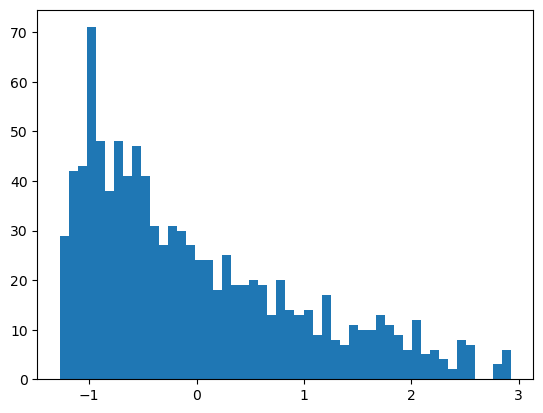

In [30]:
plt.hist(encoded_reg_dataset['gross income'], 50)
plt.show()

# Train e Test Split

Bene, è quindi giunta l'ora di affrontare l'ultima fase prima di allenare un modello di machine learning: l**o split fra training e test set**!
Per un primo approccio ti suggeriamo di usare una ratio 80:20 o 70:30, che il più delle volte funzionano bene.

Ti chiediamo di chiamare le feature di train, le feature di test, la label di train e le label di test rispettivamente con i nomi *X_train*, *X_test*, *y_train* e *y_test*:

In [31]:
# codice per splittare il dataset in training set e test set
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
# Si dividono i dati per andare a creare il training set ed il test set
X = encoded_reg_dataset.drop(['Rating'], axis=1)
y = encoded_reg_dataset['Rating']

In [32]:
# Si instanzia KFold per la cross validation
kf = KFold(n_splits = 5, shuffle = True, random_state = 42)

In [33]:
# Ciclo for per la creazione del training e del test set
for train_index, test_index in kf.split(X,y):
  X_train = X.loc[train_index]
  y_train = y.loc[train_index]
  X_test = X.loc[test_index]
  y_test = y.loc[test_index]

# Linear Regression

Ora è giunto il momento di predire i **Rating** usando il modello più semplice che hai visto, ovvero la linear regression!
Ti chiediamo di chiamare il modello *regressor*.

Procedi pure nella cella che segue:

In [34]:
# training del modello con la linear regression
# si importa il modulo per la Regressione Lineare
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , mean_absolute_error

In [35]:
# Si instanzia la regressione lineare
regressor = LinearRegression()
# Si 'allena' il modello
regressor.fit(X_train,y_train)
# Si creano le previsioni per il target
y_pred = regressor.predict(X_test).round(3)


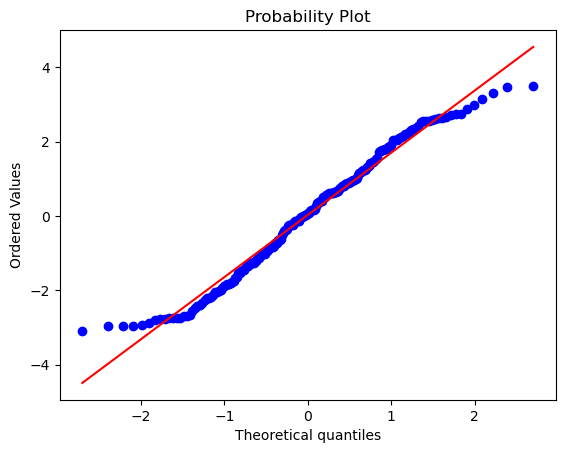

In [36]:
# Si osserva l' andamento dei residui
residuals = (y_test-y_pred)
scipy.stats.probplot(residuals,plot=plt)
plt.show()

# Analisi del plot
Si vede dal plot dei residui che la presvisione è molto vicina a quella teorica finchè ci troviamo nell'intervallo [-1.5 , 1.5].
Dopodichè tende ad allontanarsi dal modello teorico, probabilmente a causa di outliers.

Adesso che il training è avvenuto è il momento di valutare come questo performa. Le metriche che prendiamo in considerazione, che sono le principali per la regressione lineare, sono **il mean squadred error e il mean absolute error**. Ti chiediamo di calcolarle (sempre usando sklearn), avendo cura di chiamarle rispettivamente *MSE* e *MAE*. Punta a renderle il più vicine allo zero possibile, perché il modello è più di qualità quanto più queste sono zero:

In [39]:
MSE = round(mean_squared_error(y_test,y_pred),3)
MAE = round(mean_absolute_error(y_test,y_pred),3)
print('MSE =', MSE, '\nMAE =', MAE)

MSE = 2.798 
MAE = 1.397


# Polynomial Regression

Prova in questa sezione a lavorare in modo simile a quanto fatto per la linear regression, ma usando la polynomial regression, che è sicuramente più potente della prima.

Come prima, ti chiediamo di chiamare *regressor* il modello e *poly_regressor* l'oggetto relativo alle feature polinomiali:

In [40]:
# training del modello con la polynomial regression
from sklearn.preprocessing import PolynomialFeatures

In [41]:
regressor = LinearRegression()
# Si instanzia la PolynaomialFeature
poly_regressor = PolynomialFeatures(degree=2, include_bias = False)
X_train_poly = poly_regressor.fit_transform(X_train)
regressor.fit(X_train_poly,y_train)
X_test_poly = poly_regressor.fit_transform(X_test)
y_pred_poly = regressor.predict(X_test_poly)

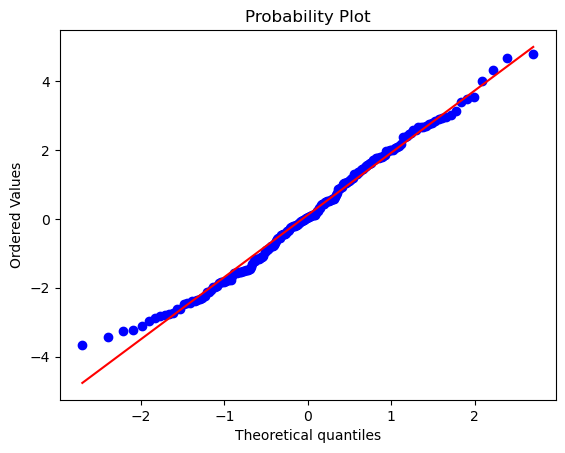

In [42]:
# Si osserva l'andamento dei residui nel caso della regressione polinomiale
residuals_poly= y_test - y_pred_poly
scipy.stats.probplot(residuals_poly,plot=plt)
plt.show()

Come cambiano le performance? C'è effettivamente un miglioramento nell'MSE e nell'MAE?

**RISPOSTA**

Andando ad usare la regressione polinomiale di grado 2 non si vede un miglioramento degli errori, ma bensì un deterioramento della performance.
Ho testato gradi superiori al secondo fino al grado quinto, ma i risultati vanno via via peggiorando, credo a causa di un peggioramento nell' approssimazione di outliers.


In [43]:
MSE = round(mean_squared_error(y_test,y_pred_poly),2)
MAE = round(mean_absolute_error(y_test,y_pred_poly),2)

print('MSE =', MSE, '\nMAE =', MAE)

MSE = 3.23 
MAE = 1.48


# Logistic Regression

In questa sezione si cambia dataset, in quanto cambia la natura del problema: si passa infatti a un problema di classificazione, in cui andrai a valutare la qualità di alcune mele destinate alla catena di supermercati per decidere quali sono le mele di qualità migliore.

La prima cosa è da fare è** importare il nuovo dataset**, ovvero apple_quality, che questa volta ti chiediamo di fare in autonomia, chiamando il dataset *classification_dataset*:

In [44]:
# codice per importare il dataset apple_quality
classification_dataset = pd.read_csv('/content/drive/MyDrive/Progetti/apple_quality.csv', encoding='windows-1254')

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/Progetti/apple_quality.csv'

Ti suggeriamo quindi  di printare le prime 50 righe...

In [45]:
# codice per print delle prime 50 righe
classification_dataset.head(50)

NameError: name 'classification_dataset' is not defined

... e dei metadati delle colonne:

In [ ]:
# codice per visualizzare i principali metadata del dataset apple_quality
classification_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4001 entries, 0 to 4000
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   float64
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4001 non-null   object 
 8   Quality      4000 non-null   object 
dtypes: float64(7), object(2)
memory usage: 281.4+ KB


Nella cella seguente si va a modificare la colonna 'Acidity' da dati testo a float.

In [ ]:
# Si inizializza una lista per la memorizzazione dei dati da convertire
acidity_list = []
# Si elimina l'ultima riga del DataFrame che contiene dati superflui
classification_dataset = classification_dataset.drop(4000)
# Ciclo for per la conversione
for i in classification_dataset['Acidity'].tolist()[0:4000]:
  acidity_list.append(float(i))
# Sostitzione colonna contenente dati formato testo a quella formato float
classification_dataset['Acidity'] = acidity_list
classification_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   float64
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4000 non-null   float64
 8   Quality      4000 non-null   object 
dtypes: float64(8), object(1)
memory usage: 281.4+ KB


Come puoi vedere, il dataset è già pulito e quasi tutte le colonne sono numeriche. L'unica a non esserlo è proprio la label, che va encodata:

In [ ]:
# codice per effettuare l'enconding della label "Quality"
# Instanziamo un OneHotEncoder
o_h_encoder = OneHotEncoder(sparse_output=True)
# Si trasformano i dati
encoded_quality = o_h_encoder.fit_transform(np.asarray(classification_dataset['Quality']).reshape(4000,1))

In [ ]:
# Si crea un nuovo DataFrame sul quale andremo a lavorare
encoded_class_dset = classification_dataset.drop('Quality',axis='columns')

In [ ]:
# Si aggiungono i dati 'encoded' al DataFrame
encoded_class_dset['Quality'] = encoded_quality.indices
encoded_class_dset.head()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590,1
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809,1
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636,0
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723,1
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984,1


Bisogna poi ri-effettuare la divisione fra porzione di addestramento e porzione di test, usando la nomenclatura vista in precedenza:

In [ ]:
# codice per splittare in train/test il dataset apple_quality
X_apple = encoded_class_dset.drop(['Quality'], axis = 1)
y_apple = encoded_class_dset['Quality']

In [ ]:
# Si usa il metodo Kfold per splittare il Dataset in train/test
kf_apples = KFold(n_splits=10,shuffle=True,random_state=62)
for train_index, test_index in kf_apples.split(X_apple,y_apple):
  X_train = X_apple.loc[train_index]
  y_train = y_apple.loc[train_index]
  X_test = X_apple.loc[test_index]
  y_test = y_apple.loc[test_index]

Puoi finalmente usare la logistic regression per allenare il modello vero e proprio, che ti chiedo di chiamare *logistic_regressor*:

In [ ]:
# codice per trainare il modello usando la logistic regression
from sklearn.linear_model import LogisticRegression
# Si instanzia la logistic regression
logistic_regressor = LogisticRegression(random_state=62,max_iter=500)
# Si addestra il modello
logistic_regressor.fit(X_train,y_train)
# Si va a creare una variabile con le label
y_predict_test = logistic_regressor.predict(X_test)

Una metrica che ti permette subito di valutare la bontà del modello, come saprai, è l'***F1 score***, che dovrebbe essere idealmente superiore a 0.80. Cerca anche di massimizzare la media della precision e del recall, che idealmente dovrebbero anch'essi essere superiori a 0.80:

In [ ]:
from sklearn.metrics import classification_report
# Si stampano i valori di verifica di bontà del modello
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.79      0.76      0.78       201
           1       0.77      0.80      0.78       199

    accuracy                           0.78       400
   macro avg       0.78      0.78      0.78       400
weighted avg       0.78      0.78      0.78       400



Ora è intessante andare a "disegnare" la **confusion matrix**, che ti mostra quali sono le categorie su cui il modello che hai costruito è "bravo" e su quali no, così da eventualmente avere delle informazioni in più per migliorarlo. Prova a farlo in autonomia usando scikit-learn:

<Axes: >

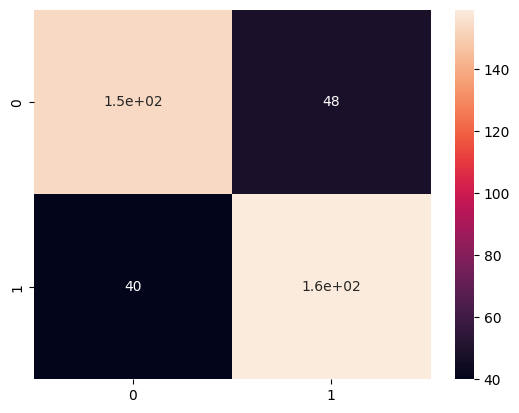

In [ ]:
# codice per la confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
# Si instanzia la confusion matrix
c_matrix = confusion_matrix(y_test,y_predict_test)
# Si va a graficare usando una heatmap in Seaborn
sns.heatmap(c_matrix,annot=True)

# Decision Tree

**Puoi provare a usare un decision tree per capire se può migliorare le prestazioni del modello basato su logistic regression.** Generalmente, come visto durante la parte teorica del Corso, i decision tree sono più potenti, ma scoprilo costruendone uno!

Il procedimento non è dissimile da quelli usati in precedenza, quindi procedi pure al training:

In [ ]:
# training del modello con un decision tree
from sklearn.tree import DecisionTreeClassifier
# Si instanzia il DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train,y_train)
# Si va a prevedere i risultati
y_pred_tree = classifier.predict(X_test)

In [ ]:
# Si stampano delle metriche per verificare la bontà del modello
print(classification_report(y_test,y_pred_tree))

              precision    recall  f1-score   support

           0       0.83      0.80      0.81       201
           1       0.80      0.83      0.82       199

    accuracy                           0.81       400
   macro avg       0.82      0.82      0.81       400
weighted avg       0.82      0.81      0.81       400



E poi alla costruzione della confusion matrix:

<Axes: >

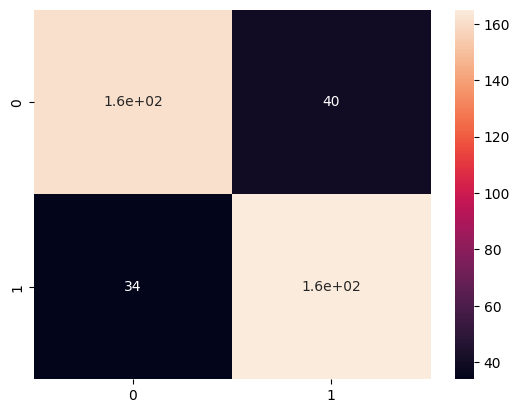

In [ ]:
# confusion matrix del decision tree
classifier_matrix = confusion_matrix(y_test,y_pred_tree)
sns.heatmap(classifier_matrix,annot=True)

Quanti sono gli errori? Di più o di meno di quelli commessi dal modello con la logistic regression?

#Risposta
**Il numero di errori è minore rispetto alla logistic regression**

Quali sono le feature che sono state più importanti per il decision tree che hai costruito? Scoprilo con la feature importance, che ti invitiamo a calcolare e poi a printare nella cella che segue:

In [ ]:
# codice per la feature importance
feature_names=X_apple.columns
classifier.feature_importances_

array([0.04726683, 0.14503712, 0.11012909, 0.16699107, 0.09387339,
       0.11361716, 0.18973221, 0.13335313])

In [ ]:
# Si realizza un DataFrame con i valori trovati
df_feature = pd.DataFrame(classifier.feature_importances_,index=feature_names,columns=['values'])
print(df_feature)

               values
A_id         0.047267
Size         0.145037
Weight       0.110129
Sweetness    0.166991
Crunchiness  0.093873
Juiciness    0.113617
Ripeness     0.189732
Acidity      0.133353


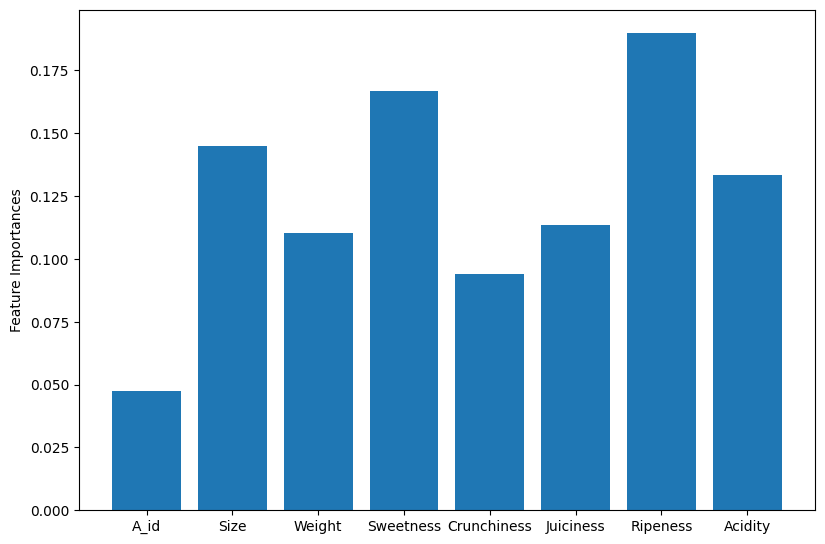

In [ ]:
# Si plottano per una verifica immediata delle features più importanti
fig,ax = plt.subplots(figsize = (9.5,6.5))
ax.bar(feature_names,df_feature['values'])
ax.set_ylabel('Feature Importances')
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
forest_class = RandomForestClassifier()
forest_class.fit(X_train,y_train)
y_forest = forest_class.predict(X_test)
print(classification_report(y_test,y_forest))

              precision    recall  f1-score   support

           0       0.89      0.88      0.88       201
           1       0.88      0.89      0.88       199

    accuracy                           0.88       400
   macro avg       0.88      0.88      0.88       400
weighted avg       0.88      0.88      0.88       400



<Axes: >

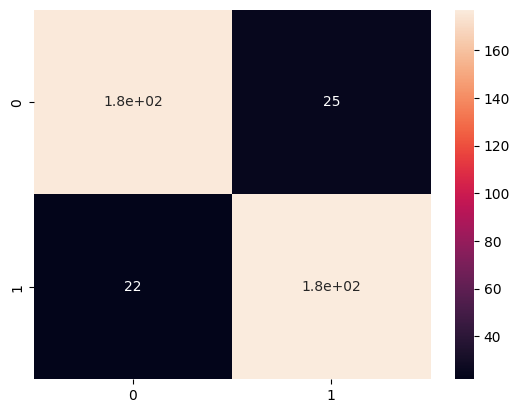

In [ ]:
forest_matrix = confusion_matrix(y_test,y_forest)
sns.heatmap(forest_matrix,annot=True)

# K-Means Clustering

Eccoci al K-Means Clustering, il più utilizzato algoritimo tra quelli non supervisionati.

Per prima cosa bisogna eliminare la label perché, come sai, il K-Means Clustering è un algoritmo non supervisionato e non deve quindi averla:

In [ ]:
clustering_dataset = classification_dataset.drop(columns=['Quality'])

Prova a trainare il modello usando l'algoritmo in oggetto, il procedimento è sempre simile a quanto visto in precedenza. Prova a settare dapprima il numero dei cluster a due (in quanto sappiamo che il dataset contiene mele buone o non buone):

In [ ]:
# codice per trainare il modello con K-Means Clustering
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 2)
kmeans.fit(clustering_dataset)
clustering_dataset['KQuality'] = kmeans.labels_
clustering_dataset.head()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,KQuality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590,1
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809,1
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636,1
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723,1
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984,1


Effettua quindi una predizione e vedi a che qualità corrisponde la mela che hai dato in input al modello:

In [ ]:
# codice per effettuare la predizione su una mela dalle carattetistiche a piacere
# Si genera una mela random partendo dai dati presenti in tabella
random_apple ={'A_id': [np.random.randint(1,4000)],
               'Size': [np.random.uniform(min(clustering_dataset['Size']),max(clustering_dataset['Size']))],
               'Weight': [np.random.uniform(min(clustering_dataset['Weight']),max(clustering_dataset['Weight']))],
               'Sweetness': [np.random.uniform(min(clustering_dataset['Sweetness']),max(clustering_dataset['Sweetness']))],
               'Crunchiness': [np.random.uniform(min(clustering_dataset['Crunchiness']),max(clustering_dataset['Crunchiness']))],
               'Juiciness': [np.random.uniform(min(clustering_dataset['Juiciness']),max(clustering_dataset['Juiciness']))],
               'Ripeness': [np.random.uniform(min(clustering_dataset['Ripeness']),max(clustering_dataset['Ripeness']))],
               'Acidity': [np.random.uniform(min(clustering_dataset['Acidity']),max(clustering_dataset['Acidity']))]}

In [ ]:
# Si crea un DataFrame con i dati della mela random
random_apple_df = pd.DataFrame(random_apple)
random_apple_df

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity
0,942,-2.758733,-4.211407,0.146368,-5.535149,0.355723,-0.937657,7.361153


In [ ]:
# Si predice il risultato usando i dati della mela random
apple_predict = kmeans.predict(random_apple_df)
print(apple_predict)

[1]


A che cluster è stata assegnata la mela, è buona o cattiva?
Che succede se invece provi a settare il numero di cluster a tre? Testa questo scenario e rifai la predizione, magari potresti scoprire che in realtà ci sono anche delle mele di qualità intermedia!

In [ ]:
# Si setta il numero dei cluster a 3
kmeans_3 = KMeans(n_clusters = 3)
kmeans_3.fit(clustering_dataset.drop(columns=['KQuality']))
clustering_dataset['KQuality'] = kmeans_3.labels_
clustering_dataset.head()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,KQuality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590,1
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809,1
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636,1
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723,1
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984,1


In [ ]:
# Si genera un' altra mela random per verificare la sua qualità
random_apple_3 ={'A_id': [np.random.randint(1,4000)],
               'Size': [np.random.uniform(min(clustering_dataset['Size']),max(clustering_dataset['Size']))],
               'Weight': [np.random.uniform(min(clustering_dataset['Weight']),max(clustering_dataset['Weight']))],
               'Sweetness': [np.random.uniform(min(clustering_dataset['Sweetness']),max(clustering_dataset['Sweetness']))],
               'Crunchiness': [np.random.uniform(min(clustering_dataset['Crunchiness']),max(clustering_dataset['Crunchiness']))],
               'Juiciness': [np.random.uniform(min(clustering_dataset['Juiciness']),max(clustering_dataset['Juiciness']))],
               'Ripeness': [np.random.uniform(min(clustering_dataset['Ripeness']),max(clustering_dataset['Ripeness']))],
               'Acidity': [np.random.uniform(min(clustering_dataset['Acidity']),max(clustering_dataset['Acidity']))]}

In [ ]:
# Si genera un DataFrame
random_apple_3_df = pd.DataFrame(random_apple_3)
random_apple_3_df

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity
0,623,1.522798,-0.335282,-0.344294,4.1954,-4.362646,2.061018,-0.468832


In [ ]:
# Si predice il risultato sulla qualità
apple_predict_3 = kmeans_3.predict(random_apple_3_df)
print(apple_predict_3)

[1]


# Time Series

L'ultimo tema del progetto è quello delle time series: se ci hai fatto caso, il dataset che hai utilizzato per la regressione è in realtà una time series a cui, per il problema di regressione stesso, è stata eliminata l'informazione sul tempo in quanto non utile in quello use case. Adesso è tempo di riprenderla!
In questo scenario vogliamo provare a **capire come i gross income evolvono nel tempo**, quindi prendi il dataset originale, ovvero *regression_raw_dataset* ed elimina tutte le colonne, tenendo solo "Date" e "gross income" e avendo cura di chiamare *timeseries_dataset* il nuovo dataset:

In [ ]:
# codice per costruire un nuovo dataset, partendo da regression_raw_dataset, con solo le colonne "Date" e "gross income"
timeseries_dataset = regression_raw_dataset[['Date','gross income']]

Dai un rapido sguardo al nuovo dataset creato, per assicurarti che sia tutto ok:

In [ ]:
timeseries_dataset = timeseries_dataset.sort_values(['Date'])
timeseries_dataset.index = range(0,len(timeseries_dataset))
timeseries_dataset.head(100)

,Date,gross income
0,1/1/2019,6.322
1,1/1/2019,8.448
2,1/1/2019,37.110
3,1/1/2019,19.036
4,1/1/2019,5.408
...,...,...
95,1/17/2019,6.282
96,1/17/2019,4.336
97,1/18/2019,21.259
98,1/18/2019,8.712


A questo punto prova a utilizzare la **linear regression** su questa serie temporale, nello stesso modo di quanto già fatto in precedenza:

In [ ]:
# training della time series con la linear regression

E vai a controllare le solite metriche, cioè MSE ed MAE:

In [ ]:


print('MSE =', MSE, '\nMAE =', MAE)

Ti renderai conto che probabilmente non sono così elevati come in precedenza, questo perché la regressione lineare sulle time series spesso fallisce e, come già visto nella teoria, c'è bisogno di altri modelli più perfomanti.

# Time Series con XGBoost (opzionale)

A proposito di modelli più performanti per le time series, ricordi XGBoost? Se ti va, puoi provare a impiegare quest'ultimo per costruire il modello. **Questa sezione è opzionale e non necessaria per superare il progetto.**

In [ ]:
# (BONUS) training e performance evalutation della time series con XGBoost